#IMPORT MODULE DAN DATA

In [ ]:
# Melakukan Import module numpy, pandas, dan seaborn
import numpy as np # Untuk perhitungan yang berkaitan dengan matematika
import pandas as pd # Untuk read csv dan processing data pada dataframe
import seaborn as sns # Untuk membuat grafik dari data yang telah diproses
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
sns.set(style="darkgrid")

import warnings
warnings.filterwarnings('ignore')

from scipy import stats # Untuk mempermudah perhitungan statistika
from datetime import * # Untuk memudahkan partisi pada time

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
meta = pd.read_csv("/content/building_metadata.csv") #Data Gedung
wtrain = pd.read_csv("/content/weather_train.csv") #Data Cuaca
train = pd.read_csv("/content/train.csv") #Data Energi

#Informasi Data

In [ ]:
meta.head() #melihat bulding_metadata atau data gedung sekilas

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [ ]:
# Melihat secara seklilas data pada train
train.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


In [ ]:
# Melihat secara seklilas data pada weather_train
wtrain.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [ ]:
#melihat informasi data type
meta.info()
train.info()
wtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   site_id      1449 non-null   int64  
 1   building_id  1449 non-null   int64  
 2   primary_use  1449 non-null   object 
 3   square_feet  1449 non-null   int64  
 4   year_built   675 non-null    float64
 5   floor_count  355 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 68.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315090 entries, 0 to 315089
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   building_id    315090 non-null  int64  
 1   meter          315090 non-null  int64  
 2   timestamp      315090 non-null  object 
 3   meter_reading  315089 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 9.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139

#Pre-processing

In [ ]:
#menghapus kolom yang tidak digunakan
df_meta = meta.drop(['site_id', 'primary_use', 'square_feet', 'floor_count'], axis=1)
df_meta.head()

,building_id,year_built
0,0,2008.0
1,1,2004.0
2,2,1991.0
3,3,2002.0
4,4,1975.0


In [ ]:
#menggabungkan meta dan train dengan kolom acuan building_id
df = pd.merge(df_meta, train, on = 'building_id')
df.head()

,building_id,year_built,meter,timestamp,meter_reading
0,0,2008.0,0,2016-01-01 00:00:00,0.0
1,0,2008.0,0,2016-01-01 01:00:00,0.0
2,0,2008.0,0,2016-01-01 02:00:00,0.0
3,0,2008.0,0,2016-01-01 03:00:00,0.0
4,0,2008.0,0,2016-01-01 04:00:00,0.0


In [ ]:
#memilih building_id dari 10-40
df.drop(df[(df['building_id']<10) & (df['building_id']>40)].index, inplace=True)
df.head()

,building_id,year_built,meter,timestamp,meter_reading
0,0,2008.0,0,2016-01-01 00:00:00,0.0
1,0,2008.0,0,2016-01-01 01:00:00,0.0
2,0,2008.0,0,2016-01-01 02:00:00,0.0
3,0,2008.0,0,2016-01-01 03:00:00,0.0
4,0,2008.0,0,2016-01-01 04:00:00,0.0


In [ ]:
#memastikan data yang diambil berindex 10 - 40
min_value = df['building_id'].min()
max_value = df['building_id'].max()

print(min_value,'-', max_value)

0 - 1448


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315090 entries, 0 to 315089
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   building_id    315090 non-null  int64  
 1   year_built     126975 non-null  float64
 2   meter          315090 non-null  int64  
 3   timestamp      315090 non-null  object 
 4   meter_reading  315089 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 14.4+ MB


In [ ]:
# Menyimpan data hasil processing untuk keperluan selanjutnya
df.to_csv("df.csv", encoding='utf8', index=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315090 entries, 0 to 315089
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   building_id    315090 non-null  int64  
 1   year_built     126975 non-null  float64
 2   meter          315090 non-null  int64  
 3   timestamp      315090 non-null  object 
 4   meter_reading  315089 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 14.4+ MB


In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp']) #mengubah tipe data timestamp menjadi datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315090 entries, 0 to 315089
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   building_id    315090 non-null  int64         
 1   year_built     126975 non-null  float64       
 2   meter          315090 non-null  int64         
 3   timestamp      315090 non-null  datetime64[ns]
 4   meter_reading  315089 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 14.4 MB


In [ ]:
#Cek banyak missing value
df_missing = df.isnull().sum()
df_missing

building_id           0
year_built       188115
meter                 0
timestamp             0
meter_reading         1
dtype: int64

In [ ]:
#Menghitung persentase banyaknya missing values
df_missing = (df.isnull().sum()/len(df)*100).to_frame('persentase missing value (%)')
df_missing

,persentase missing value (%)
building_id,0.000000
year_built,59.701990
meter,0.000000
timestamp,0.000000
meter_reading,0.000317


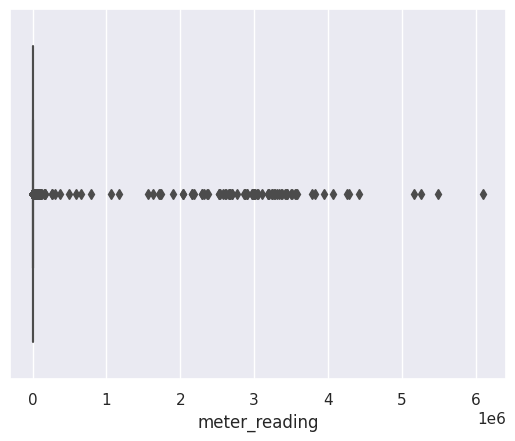

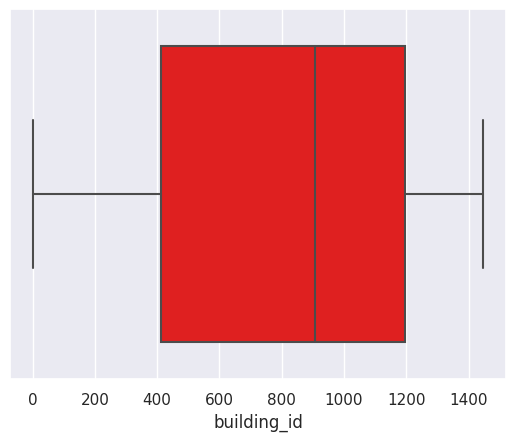

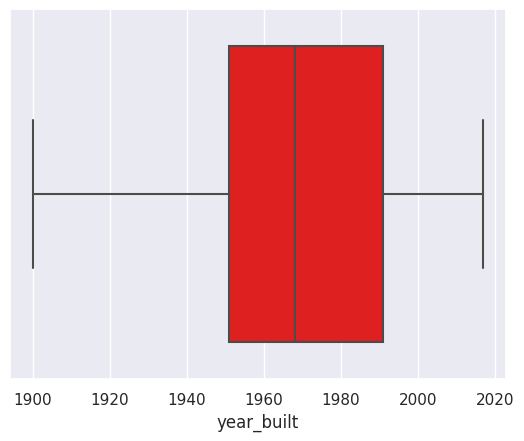

In [ ]:
#Menghitung outliers
sns.boxplot(x=df['meter_reading'],color='red')
plt.show()
sns.boxplot(x=df['building_id'],color='red')
plt.show()
sns.boxplot(x=df['year_built'],color='red')
plt.show()

#SAMPAI SINI DULU YAh

In [ ]:
All[['month']]=All[['month']].astype('str')
All[['year']]=All[['year']].astype('str')

NameError: ignored

In [ ]:
All.info()

In [ ]:
All.head()

In [ ]:
# Mengabaikan data yang memiliki missing value pada kolom timestamp, month, dan year
All = All[All['timestamp'].notna()]
All = All[All['month'].notna()]
All = All[All['year'].notna()]

In [ ]:
# Perhatikan sekarang "Date" tidak lagi berupa variable, tapi merupakan index bagi dataframenya
All = pd.read_csv('meta', parse_dates=True, index_col = "Date", error_bad_lines=False, low_memory = False)
All.info()
All.head()

In [ ]:
# Menyimpan data hasil processing untuk keperluan selanjutnya
All.to_csv("Time Series Visual.csv", encoding='utf8', index=False)

In [ ]:
All = pd.DataFrame('meter')

In [ ]:
#fungsi rekursif untuk melihat distribusi data
sns.set_theme()

def draw_distribution_graph(dataframe, column_name):

    fig, ax = plt.subplots(figsize=(8, 8))
    sns.distplot(dataframe[column_name], color='blue', ax = ax).set_title("Distribusi penggunaan ".format(column_name), fontsize=16)
    plt.xlabel(column_name, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.show()

In [ ]:
draw1 = draw_distribution_graph(, 'Scale_PSS10_UCLA_1')